## Question 1.b)
Download the housing price data set of Windsor City of Canada ( provided on my website link). Design a housing price predictor taking only floor area (plot size), number of bedrooms, and number of bathrooms into considerations. Out of total 546 data , you may take 70% for designing the predictor and 30% for validating the design. The predictor design should be done using the following methods:

<b>b) Design Predictor using Batch Gradient Descent Algorithm, Stochastic Gradient Algorithm and mini batch Gradient Descent algorithms (determining minibatch size is your choice- here it could be 10, 20, 30 etc.) with and without feature scaling and compare their performances in terms of % error in prediction.(only allowed to use NumPy library of Python, no other functions/libraries are allowed)<b>


In [103]:
#Loading numpy
import numpy as np
import matplotlib.pyplot as plt
import random

In [104]:
#Reading Data from Housing Price data set.csv
read_data = np.genfromtxt("Housing Price data set.csv",delimiter=',')
data = np.array(read_data[1:,1:5],dtype=np.int)

**Splitting data into x and y** \
 y = Price as label \
 x = (floor Area, number of bedrooms, number of bathrooms) i.e x1,x2,x3

In [105]:
#processing data
np.random.shuffle(data)     # shuffling , splitting of train and validation to unbaised
y = data[:,0:1]
x = data[:,1:]
print("Prices(top 5) :\n",y[:5])
print("\nx1,x2,x3(top 5) :\n",x[:5])

Prices(top 5) :
 [[78000]
 [34400]
 [49500]
 [46000]
 [48000]]

x1,x2,x3(top 5) :
 [[6600    4    2]
 [3635    2    1]
 [3060    3    1]
 [2684    2    1]
 [3720    2    1]]


preprocessing (adding colum of 1 and splitting data)

In [106]:
m,n = x.shape
ones = np.ones((m,n+1),dtype=np.int)
ones[:,1:] = x         #broadcasting
x_data = ones

#splitting data into training(70%) and validation(30%) 
split = int(m*0.7)
x_train = x_data[:split]
y_train = y[:split]
x_valid = x_data[split:]
y_valid = y[split:]
print(x.shape,x_train.shape,x_valid.shape)

(546, 3) (382, 4) (164, 4)


### Feature Scaling (using Standered Normalization)
\begin{equation}
    x' = \frac{x-\mu}{\sigma}
\end{equation}

In [107]:
m = np.mean(x_train,axis=0)           #mean along column
s = np.std(x_train,axis=0)+0.00001     #to avoid divide by zero
xscale_train = (x_train-m)/s
m = np.mean(x_valid,axis=0)
s = np.std(x_valid,axis=0)+0.00001
xscale_valid = (x_valid-m)/s            #also scaling validation data

In [108]:
#Defining Hypothesis
def hypothesis(x,w):
    return np.dot(x,w)

#Defining Cost Function to calculate loss
def costFunction(x,y,w):
    m,n = x.shape
    return np.sum((hypothesis(x,w)-y)**2)/(2*m)

def costFunctionWithRegularization(x,y,w,lembda=0.1):
    m,n = x.shape
    return (np.sum((hypothesis(x,w)-y)**2) + (np.sum(w**2)*lembda))/(2*m)

#dJ/dw gradofj
def gradW(x,y,w):
    return ((hypothesis(x,w)-y)*x)

In [124]:
def percentageError(err1,err2):
    p_err =  ((err1-err2)*100)/err1
    p_err = np.round(p_err,3)
    if p_err<0:
        print("Error1 < Error2 by",-p_err,"%\n")
    elif p_err==0:
        print("Error1 == Error\n")
    else:
        print("Error1 > than Error2 :",p_err,"%\n")

In [110]:
#function to plot epoch vs loss
def plotLoss(loss):
    f=plt.figure()
    plt.xlabel("--Epoch--")
    plt.ylabel("--Loss --")
    plt.title("epoch vs loss")
    plt.plot(loss)
    plt.show()

# Batch Gradient Descent 
\begin{equation}
    w_j = w_j - \frac{\alpha}{m} \sum _{i=1}^{i=m}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

In [111]:
def batchGradientDescent(x,y,alpha=0.1,max_epoch=200):
    m,n = x.shape
    loss = []
    w = np.ones((n,1))
    loss.append(costFunction(x,y,w))
    for i in range(1,max_epoch):
        dw = np.zeros((n,1))
        for xi,yi in zip(x,y):
            dw += gradW(xi,yi,w).reshape(n,1)
        w = w - (alpha/m)*dw
        loss.append(costFunction(x,y,w))
    return w,loss

### Batch gradient descent(with feature scaling)

-------------alpha = 0.1


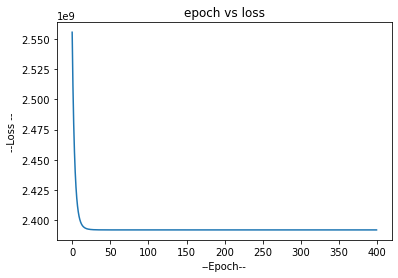


-------------alpha = 0.01


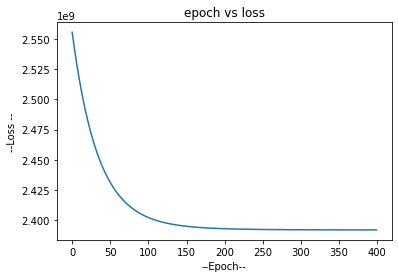


-------------alpha = 0.001


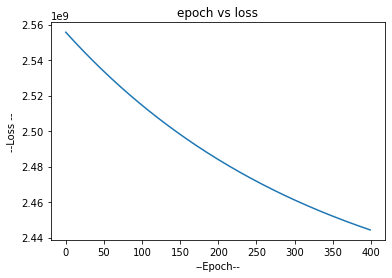


-------------alpha = 0.0001


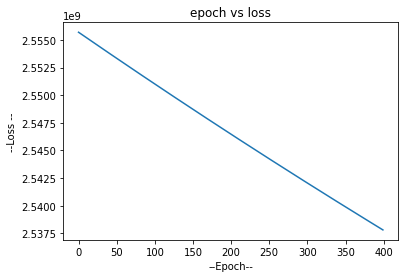

In [112]:
print("-------------alpha =",0.1)
w,loss =batchGradientDescent(xscale_train,y_train,0.1,400)
plotLoss(loss)
print("\n-------------alpha =",0.01)
w,loss =batchGradientDescent(xscale_train,y_train,0.01,400)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =batchGradientDescent(xscale_train,y_train,0.001,400)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =batchGradientDescent(xscale_train,y_train,0.0001,400)
plotLoss(loss)

### Batch gradient descent(without feature scaling)

-------------alpha = 0.1


/home/virtual/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-108-6358e631452f>:8: RuntimeWarning: overflow encountered in square
  return np.sum((hypothesis(x,w)-y)**2)/(2*m)
<ipython-input-111-454d01dad07c>:9: RuntimeWarning: overflow encountered in add
  dw += gradW(xi,yi,w).reshape(n,1)
<ipython-input-111-454d01dad07c>:10: RuntimeWarning: invalid value encountered in subtract
  w = w - (alpha/m)*dw


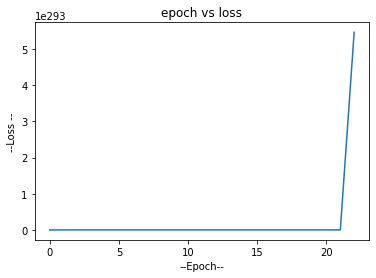


-------------alpha = 0.01


<ipython-input-108-6358e631452f>:16: RuntimeWarning: overflow encountered in multiply
  return ((hypothesis(x,w)-y)*x)


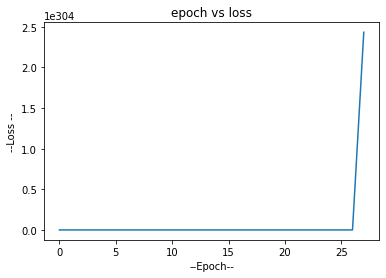


-------------alpha = 0.001


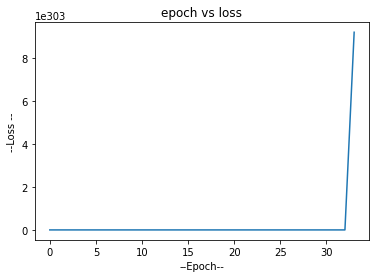


-------------alpha = 0.0001


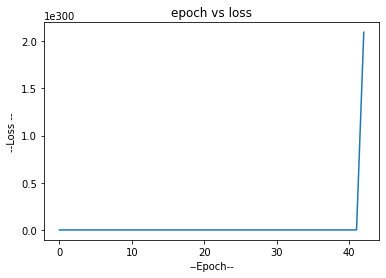

In [113]:
print("-------------alpha =",0.1)
w,loss =batchGradientDescent(x_train,y_train,0.1,100)
plotLoss(loss)
print("\n-------------alpha =",0.01)
w,loss =batchGradientDescent(x_train,y_train,0.01,100)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =batchGradientDescent(x_train,y_train,0.001,100)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =batchGradientDescent(x_train,y_train,0.0001,100)
plotLoss(loss)

## Analysis of Batch Gradient descent
<b>without Feature scaling</b>
<ul>
  <li>It fails to optimize loss when data is not scaled </li>
  <li>Without scaling ,<b>overflow</b> for higher $\alpha$ i.e $\alpha$ = 0.1  </li>
    <li>Without scaling , Rather than decreasing loss,it increases loss with epoch</li>
    </ul>
    <b>with Feature scaling</b>
    <ul>
  <li>Scaled data, Optimizer works Properly</li>
    <li>Scaled data,decreasing $\alpha$ decreases the rate of decrease in loss over epoch</li>
    <li>Suggested value, $\alpha$ =0.01 with epoch$<=$ 400 for scaled data</li>
<ul>



# Stochastic Gradient Descent 
\begin{equation}
    w_j = w_j - {\alpha}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

In [114]:
def stochasticGradientDescent(x,y,alpha=0.1,max_epoch=400):
    m,n = x.shape
    loss = []
    w = np.ones((n,1))
    loss.append(costFunction(x,y,w))
    for _ in range(1,max_epoch):
        one = np.ones((m,n+1))
        one[:,:-1] = x[:,:]
        one[:,-1:] = y[:,:]
        np.random.shuffle(one) 
        x = one[:,:-1]
        y = one[:,-1:]
        dw = np.zeros((n,1))
        for xi,yi in zip(x,y):
            dw += gradW(xi,yi,w).reshape(n,1)
            w = w - (alpha/m)*dw
        loss.append(costFunction(x,y,w))
    return w,loss



### Stochastic Gradient descent(with feature scaling)

-------------alpha = 0.1


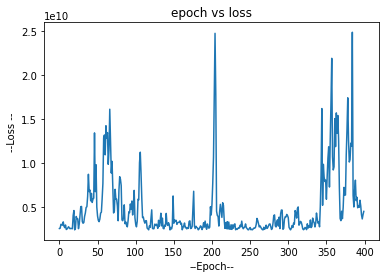


-------------alpha = 0.01


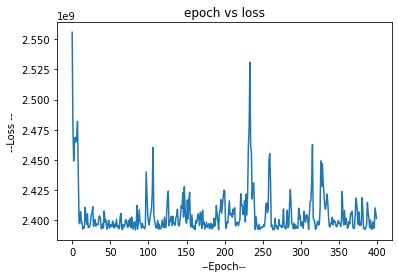


-------------alpha = 0.001


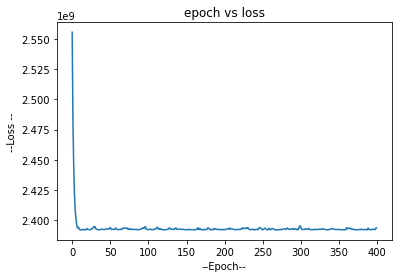


-------------alpha = 0.0001


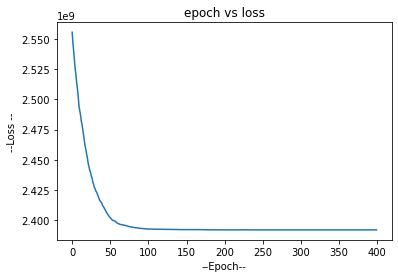

In [115]:
print("-------------alpha =",0.1)
w,loss =stochasticGradientDescent(xscale_train,y_train,0.1,400)
plotLoss(loss)
print("\n-------------alpha =",0.01)
w,loss =stochasticGradientDescent(xscale_train,y_train,0.01,400)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =stochasticGradientDescent(xscale_train,y_train,0.001,400)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =stochasticGradientDescent(xscale_train,y_train,0.0001,400)
plotLoss(loss)

### Stochastic Gradient descent(without feature scaling)


-------------alpha = 0.01


<ipython-input-108-6358e631452f>:16: RuntimeWarning: overflow encountered in multiply
  return ((hypothesis(x,w)-y)*x)
<ipython-input-114-06221646048c>:15: RuntimeWarning: invalid value encountered in add
  dw += gradW(xi,yi,w).reshape(n,1)


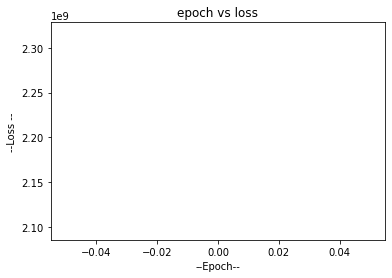


-------------alpha = 0.001


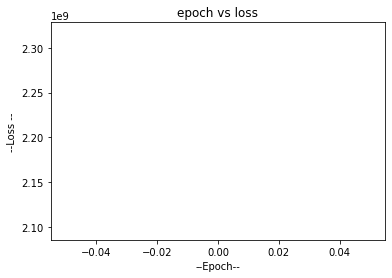


-------------alpha = 0.0001


<ipython-input-108-6358e631452f>:8: RuntimeWarning: overflow encountered in square
  return np.sum((hypothesis(x,w)-y)**2)/(2*m)


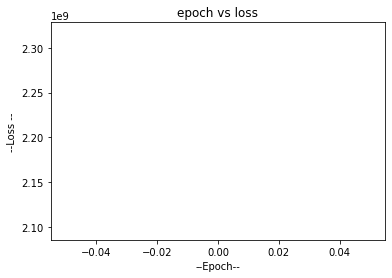

In [116]:
print("\n-------------alpha =",0.01)
w,loss =stochasticGradientDescent(x_train,y_train,0.01,100)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =stochasticGradientDescent(x_train,y_train,0.001,100)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =stochasticGradientDescent(x_train,y_train,0.0001,100)
plotLoss(loss)

## Analysis for Stochastic Gradient Descent
<b>without Feature scaling</b>
<ul>
  <li>It fails to optimize loss when data is not scaled </li>
    <li>Without scaling ,<b>overflow</b> for higher $\alpha$ i.e $\alpha$ = 0.1  </li>
    <li>Without scaling , Rather than decreasing loss,it increases loss with epoch</li>
</ul>
<b>with Feature scaling</b>
<ul>
  <li>Scaled data, Optimizer works Properly.</li>
    <li>Oscillation in loss with epoch </li>
    <li>Scaled data,decreasing $\alpha$ decreases the rate of decrease in loss over epoch with oscillation.</li>
    <li>less value of  $\alpha$  less oscillation.</li>
    <li>Optimizes the loss with less number of epochs.</li>
<ul>


# Mini-Batch Gradient Descent
\begin{equation}
    w_j = w_j - \frac{\alpha}{b} \sum _{i=1}^{i=b}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

In [117]:
def getBatch(x,y,batch_size=10):
    m,n = x.shape
    n_batch = m//batch_size
    m_new = n_batch*batch_size
    x_batch = x[:m_new]
    y_batch = y[:m_new]
    batches=[]
    i=0
    while i<m_new:
        x_mini_batch = x_batch[i:i+batch_size,:]
        y_mini_batch = y_batch[i:i+batch_size,:]
        batches.append([x_mini_batch,y_mini_batch])
        i += batch_size
    return batches


def miniBatchGradientDescent(x,y,alpha=0.1,max_epoch=200,batch_size=10):
    m,n = x.shape
    loss = []
    w = np.ones((n,1))
    loss.append(costFunction(x,y,w))
    batches = getBatch(x,y,batch_size)
    for _ in range(1,max_epoch):
        random.shuffle(batches)
        for batch in batches:
            dw = np.zeros((n,1))
            for xi,yi in zip(batch[0],batch[1]):
                dw += gradW(xi,yi,w).reshape(n,1)
            w = w - (alpha/batch_size)*dw
        loss.append(costFunction(x,y,w))
    return w,loss

b=getBatch(x_train[:20],y_train[:20],10)

### Mini-Batch Gradient Descent (without feature scaling)


-------------alpha = 0.01


<ipython-input-108-6358e631452f>:8: RuntimeWarning: overflow encountered in square
  return np.sum((hypothesis(x,w)-y)**2)/(2*m)
<ipython-input-117-54f8178fa714>:28: RuntimeWarning: overflow encountered in add
  dw += gradW(xi,yi,w).reshape(n,1)
<ipython-input-117-54f8178fa714>:29: RuntimeWarning: invalid value encountered in subtract
  w = w - (alpha/batch_size)*dw


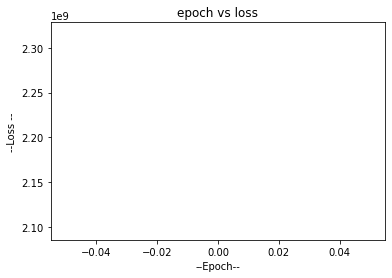


-------------alpha = 0.001


<ipython-input-108-6358e631452f>:16: RuntimeWarning: overflow encountered in multiply
  return ((hypothesis(x,w)-y)*x)


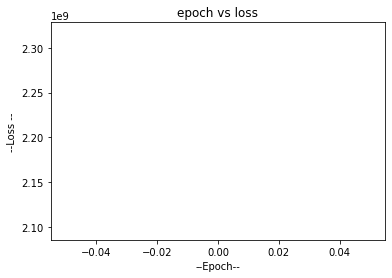


-------------alpha = 0.0001


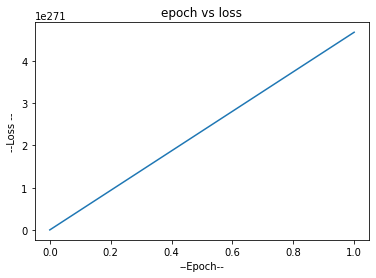

In [118]:
print("\n-------------alpha =",0.01)
w,loss =miniBatchGradientDescent(x_train,y_train,0.01,10,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =miniBatchGradientDescent(x_train,y_train,0.001,10,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =miniBatchGradientDescent(x_train,y_train,0.0001,10,batch_size=10)
plotLoss(loss)

### Mini-Batch Gradient Descent (with feature scaling)

-------------alpha = 0.1


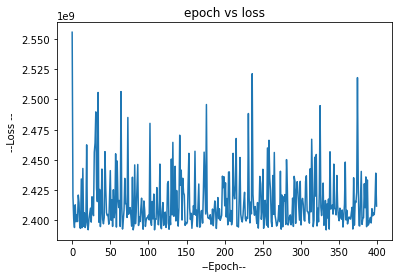


-------------alpha = 0.01


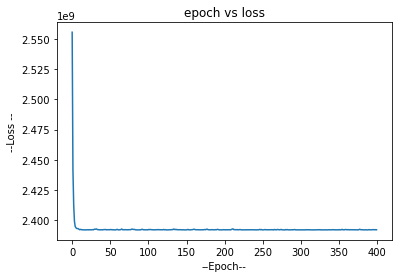


-------------alpha = 0.001


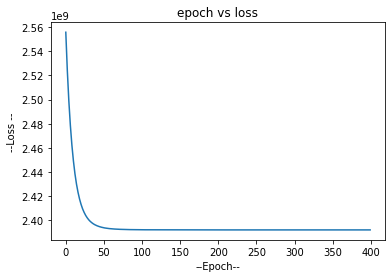


-------------alpha = 0.0001


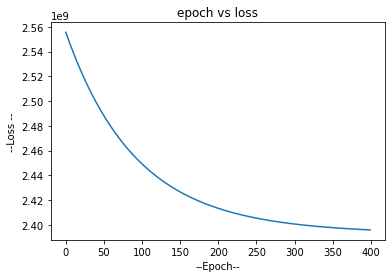

In [119]:
print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.1,400,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.01)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.01,400,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.001,400,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.0001,400,batch_size=10)
plotLoss(loss)

### Mini-Batch with different batches

-------------alpha = 0.1


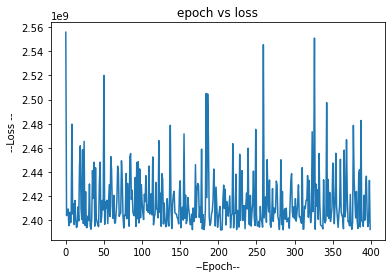

-------------alpha = 0.1


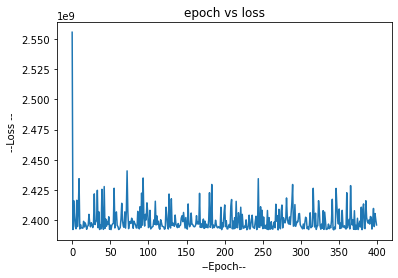

-------------alpha = 0.1


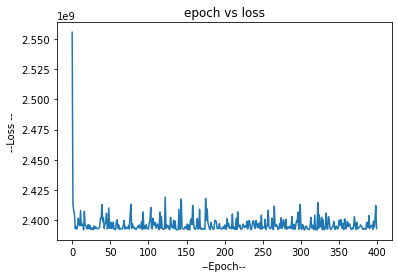

-------------alpha = 0.1


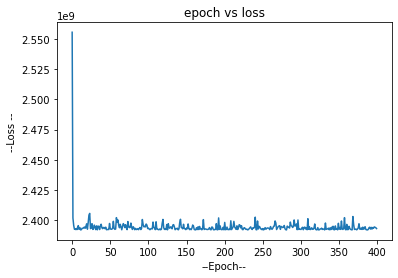

-------------alpha = 0.1


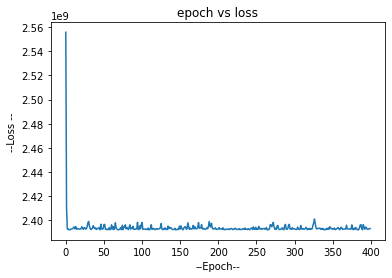

In [120]:
print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.1,400,batch_size=10)
plotLoss(loss)

print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.1,400,batch_size=20)
plotLoss(loss)

print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.1,400,batch_size=30)
plotLoss(loss)

print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.1,400,batch_size=40)
plotLoss(loss)

print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,0.1,400,batch_size=50)
plotLoss(loss)


## Analysis of Mini-Batch Gradient descent
<b>without Feature scaling</b>
<ul>
  <li>It fails to optimize loss when data is not scaled </li>
    <li><b>overflow</b> for higher $\alpha$ i.e $\alpha$ = 0.1  </li>
    <li>Rather than decreasing loss,it increases loss with epoch</li>
</ul>
<b>with Feature scaling</b>
<ul>
    <li>Scaled data, Optimizer works Properly.</li>
    <li>Oscillation in loss with epoch </li>
    <li>decreasing $\alpha$ decreases the rate of decrease in loss over epoch with oscillation.</li>
    <li>less value of  $\alpha$  less oscillation.</li>
    <li>Optimizes the loss with less number of epochs.</li>
    <li>Less oscillation  than stochastic gradient descent</li>
    <ul>
        <li>Increasing batch size decreases the oscillation in curve of epoch vs loss</li>
    </ul>
<ul>


# Comparing  performances in terms of % error in prediction

\begin{equation}
    \frac{error1-error2}{error1} \times 100
\end{equation}

In [132]:
w1,loss =batchGradientDescent(xscale_train,y_train,0.01,200)
w2,loss =stochasticGradientDescent(xscale_train,y_train,0.01,200)
w3,loss =miniBatchGradientDescent(xscale_train,y_train,0.01,200)

print("Error1 : Error using batch Gradient Descent")
print("Error2 : Error using stochastic\n")

print("Error (using Batch(GD)) -> ",costFunction(xscale_valid,y_valid,w1))
print("Error (using stochastic(GD)) -> ",costFunction(xscale_valid,y_valid,w2))
print("Error (using mini-batch(GD)) -> ",costFunction(xscale_valid,y_valid,w3))

err_w1 = costFunction(xscale_valid,y_valid,w1)
err_w2 = costFunction(xscale_valid,y_valid,w2)
percentageError(err_w2,err_w1)

print("Error1 : Error using stochastic Gradient descent")
print("Error2 : Error using mini Batch  Gradient descent\n")

err_w1 = costFunction(xscale_valid,y_valid,w2)
err_w2 = costFunction(xscale_valid,y_valid,w3)
percentageError(err_w2,err_w1)

print("Error1 : Error using batch Gradient descent")
print("Error2 : Error using mini Batch  Gradient descent\n")

err_w1 = costFunction(xscale_valid,y_valid,w1)
err_w2 = costFunction(xscale_valid,y_valid,w3)
percentageError(err_w2,err_w1)

Error1 : Error using batch Gradient Descent
Error2 : Error using stochastic

Error (using Batch(GD)) ->  2774312361.99012
Error (using stochastic(GD)) ->  2794226913.273663
Error (using mini-batch(GD)) ->  2774739874.540367
Error1 > than Error2 : 0.713 %

Error1 : Error using stochastic Gradient descent
Error2 : Error using mini Batch  Gradient descent

Error1 < Error2 by 0.702 %

Error1 : Error using batch Gradient descent
Error2 : Error using mini Batch  Gradient descent

Error1 > than Error2 : 0.015 %



<b>Comparision</b>
<ul>
    <li>Error due after using batch(GD) and mini-batch(GD) is nearly same</li>
    <li>Error comparision with stocastic with other (GD) is higher</li>
    <li>For current dataset ,mini-batch Gradient Descent is better optimizer</li>
    </ul>